In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['figure.dpi'] = 500
plt.rcParams['text.color'] = 'w'
plt.rcParams['axes.labelcolor'] = 'k'
plt.rcParams['xtick.color'] = 'w'
plt.rcParams['ytick.color'] = 'w'
plt.rcParams['axes.edgecolor'] = 'w'
plt.rcParams['figure.facecolor'] = 'k'
plt.rcParams['axes.facecolor'] = 'k'
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import LogNorm
from matplotlib.patches import FancyArrowPatch
import matplotlib.colors as colors
from astropy.visualization import SqrtStretch, LinearStretch, LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
import pandas as pd
import re
from astropy.io import fits
import os
from scipy.ndimage import map_coordinates
from scipy.stats import binned_statistic
from scipy.spatial.distance import cdist
from scipy.optimize import linear_sum_assignment
from pathlib import Path
from scipy.stats import gaussian_kde
import seaborn as sns
import plotly.graph_objects as go
from scipy.interpolate import griddata
import matplotlib.ticker as ticker
import shutil

from matplotlib.lines import Line2D
import moviepy as mpy
os.chdir("/Users/ainsleylewis/Documents/Astronomy/IllustrisTNG Lens Modelling")

In [38]:
df = pd.read_csv('/Volumes/T7 Shield/Simulation Output/System 1/Sim 9.csv', header=0)

In [39]:
# Fill missing values in pos_rms column with 1
df['pos_rms'] = df['pos_rms'].fillna(1)
df['mag_rms'] = df['mag_rms'].fillna(6000)

In [40]:
df

m          n    o  num_images   pos_rms     mag_rms  avg_mag_per  \
0       0.001    0.00000 -0.5           4  0.008093   10.260451   238.988926   
1       0.001    3.63636 -0.5           4  0.008083    7.179766   198.317139   
2       0.001    7.27273 -0.5           4  0.008107   10.490206   241.980298   
3       0.001   10.90909 -0.5           4  0.008151   10.359381   240.273998   
4       0.001   14.54545 -0.5           4  0.008204   10.328758   239.870894   
...       ...        ...  ...         ...       ...         ...          ...   
999995  0.100  345.45455  0.5           6  0.005580  198.156151   842.492754   
999996  0.100  349.09091  0.5           6  0.001145   59.818057   368.612516   
999997  0.100  352.72727  0.5           4  0.003037   54.018833   687.648354   
999998  0.100  356.36364  0.5           4  0.009191   24.193465   264.581775   
999999  0.100  360.00000  0.5           4  0.014901   27.728851   336.569304   

              chi2  source_x  source_y  ...     POW_e  POW_$θ_{e}$  \
0       179.448900  20.82713  20.77093  ...  0.054660    175.36540   
1       181.064400  20.82736  20.77187  ...  0.062883    175.28940   
2       181.174300  20.82714  20.77083  ...  0.054281    175.15590   
3       182.040700  20.82713  20.77082  ...  0.054621    175.05670   
4       182.820700  20.82705  20.77081  ...  0.054835    174.96320   
...            ...       ...       ...  ...       ...          ...   
999995  114.171400  20.79115  20.76030  ...  0.887197     79.45981   
999996    4.512077  20.79087  20.75875  ...  0.901615     81.58509   
999997   34.005760  20.79474  20.79018  ...  0.522059     83.39183   
999998  307.022400  20.79299  20.77724  ...  0.725231     85.81207   
999999  793.799000  20.79330  20.78196  ...  0.654045     88.27922   

        POW_$r_{Ein}$  POW_$\gamma$ (PWI)  PERT_$z_{s,fid}$  PERT_x  PERT_y  \
0            0.874162            1.704423               1.0   20.78   20.78   
1            0.840660            1.755846               1.0   20.78   20.78   
2            0.876589            1.701032               1.0   20.78   20.78   
3            0.874706            1.703706               1.0   20.78   20.78   
4            0.874802            1.703639               1.0   20.78   20.78   
...               ...                 ...               ...     ...     ...   
999995       0.346019            2.299992               1.0   20.78   20.78   
999996       0.353431            2.300000               1.0   20.78   20.78   
999997       0.191185            1.700101               1.0   20.78   20.78   
999998       0.283128            2.071016               1.0   20.78   20.78   
999999       0.258843            1.970127               1.0   20.78   20.78   

        PERT_$\gamma$  PERT_$θ_{\gamma}$  PERT_$\kappa$  
0               0.001            0.00000           -0.5  
1               0.001            3.63636           -0.5  
2               0.001            7.27273           -0.5  
3               0.001           10.90909           -0.5  
4               0.001           14.54545           -0.5  
...               ...                ...            ...  
999995          0.100          345.45450            0.5  
999996          0.100          349.09090            0.5  
999997          0.100          352.72730            0.5  
999998          0.100          356.36360            0.5  
999999          0.100          360.00000            0.5  

[1000000 rows x 43 columns]

In [41]:
df['PERT_$θ_{\gamma}$'].unique()

array([  0.     ,   3.63636,   7.27273,  10.90909,  14.54545,  18.18182,
        21.81818,  25.45455,  29.09091,  32.72727,  36.36364,  40.     ,
        43.63636,  47.27273,  50.90909,  54.54545,  58.18182,  61.81818,
        65.45455,  69.09091,  72.72727,  76.36364,  80.     ,  83.63636,
        87.27273,  90.90909,  94.54545,  98.18182, 101.8182 , 105.4545 ,
       109.0909 , 112.7273 , 116.3636 , 120.     , 123.6364 , 127.2727 ,
       130.9091 , 134.5454 , 138.1818 , 141.8182 , 145.4546 , 149.0909 ,
       152.7273 , 156.3636 , 160.     , 163.6364 , 167.2727 , 170.9091 ,
       174.5454 , 178.1818 , 181.8182 , 185.4546 , 189.0909 , 192.7273 ,
       196.3636 , 200.     , 203.6364 , 207.2727 , 210.9091 , 214.5454 ,
       218.1818 , 221.8182 , 225.4546 , 229.0909 , 232.7273 , 236.3636 ,
       240.     , 243.6364 , 247.2727 , 250.9091 , 254.5454 , 258.1818 ,
       261.8182 , 265.4545 , 269.0909 , 272.7273 , 276.3636 , 280.     ,
       283.6364 , 287.2727 , 290.9091 , 294.5455 , 

In [42]:
df = df[df['PERT_$θ_{\gamma}$'] == 120]

In [43]:
df

m      n    o  num_images   pos_rms     mag_rms  avg_mag_per  \
33      0.001  120.0 -0.5           4  0.007700    5.756362    87.398301   
133     0.002  120.0 -0.5           4  0.324051  215.096275  2625.477425   
233     0.003  120.0 -0.5           4  0.327913  128.558615  1677.168360   
333     0.004  120.0 -0.5           4  0.334240   85.384686  1213.496754   
433     0.005  120.0 -0.5           4  0.007146    7.081494   197.036242   
...       ...    ...  ...         ...       ...         ...          ...   
999533  0.096  120.0  0.5           6  0.076336  304.237228  4494.224697   
999633  0.097  120.0  0.5           8  0.028771  229.133138  3343.897807   
999733  0.098  120.0  0.5           8  0.032270  406.084914  5611.324689   
999833  0.099  120.0  0.5           8  0.028498  144.949956  2172.368285   
999933  0.100  120.0  0.5           8  0.029317   93.271081  1431.679282   

             chi2  source_x  source_y  ...         POW_e  POW_$θ_{e}$  \
33       178.3970  20.82991  20.78600  ...  2.079608e-01    -4.151467   
133     2218.2830  20.82727  20.79649  ...  2.641163e-08   -23.686860   
233     3019.3740  20.83042  20.79910  ...  6.302048e-09   -30.028250   
333     3859.6630  20.83477  20.80154  ...  7.021715e-07   -28.921850   
433      146.8892  20.82787  20.77172  ...  6.899608e-02  -181.259800   
...           ...       ...       ...  ...           ...          ...   
999533  3407.8690  20.81523  20.77384  ...  4.230169e-01    28.951120   
999633  3482.7280  20.81568  20.77403  ...  4.773867e-01    28.576000   
999733  3513.6810  20.81589  20.77402  ...  4.677889e-01    28.653220   
999833  3564.1730  20.81614  20.77406  ...  5.044420e-01    28.391460   
999933  3607.9210  20.81634  20.77414  ...  5.363562e-01    28.144640   

        POW_$r_{Ein}$  POW_$\gamma$ (PWI)  PERT_$z_{s,fid}$  PERT_x  PERT_y  \
33           0.689849            2.203138               1.0   20.78   20.78   
133          0.645305            2.299986               1.0   20.78   20.78   
233          0.641694            2.299990               1.0   20.78   20.78   
333          0.638870            2.298979               1.0   20.78   20.78   
433          0.850714            1.739167               1.0   20.78   20.78   
...               ...                 ...               ...     ...     ...   
999533       0.230762            1.913330               1.0   20.78   20.78   
999633       0.269613            2.142490               1.0   20.78   20.78   
999733       0.261935            2.091222               1.0   20.78   20.78   
999833       0.279631            2.211158               1.0   20.78   20.78   
999933       0.290882            2.295079               1.0   20.78   20.78   

        PERT_$\gamma$  PERT_$θ_{\gamma}$  PERT_$\kappa$  
33              0.001              120.0           -0.5  
133             0.002              120.0           -0.5  
233             0.003              120.0           -0.5  
333             0.004              120.0           -0.5  
433             0.005              120.0           -0.5  
...               ...                ...            ...  
999533          0.096              120.0            0.5  
999633          0.097              120.0            0.5  
999733          0.098              120.0            0.5  
999833          0.099              120.0            0.5  
999933          0.100              120.0            0.5  

[10000 rows x 43 columns]

In [44]:
x = df['PERT_$\gamma$'].values
y = df['PERT_$\kappa$'].values
z = df['pos_rms'].values

# Remove NaN values
mask = ~np.isnan(z)
x = x[mask]
y = y[mask]
z = z[mask]

# Create interpolation grid
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate z values on regular grid
zi = griddata((x, y), z, (xi, yi), method='linear')

In [45]:
vmin = np.nanmin(zi[zi>0])
vmax = np.nanmax(zi)
norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=LogStretch())

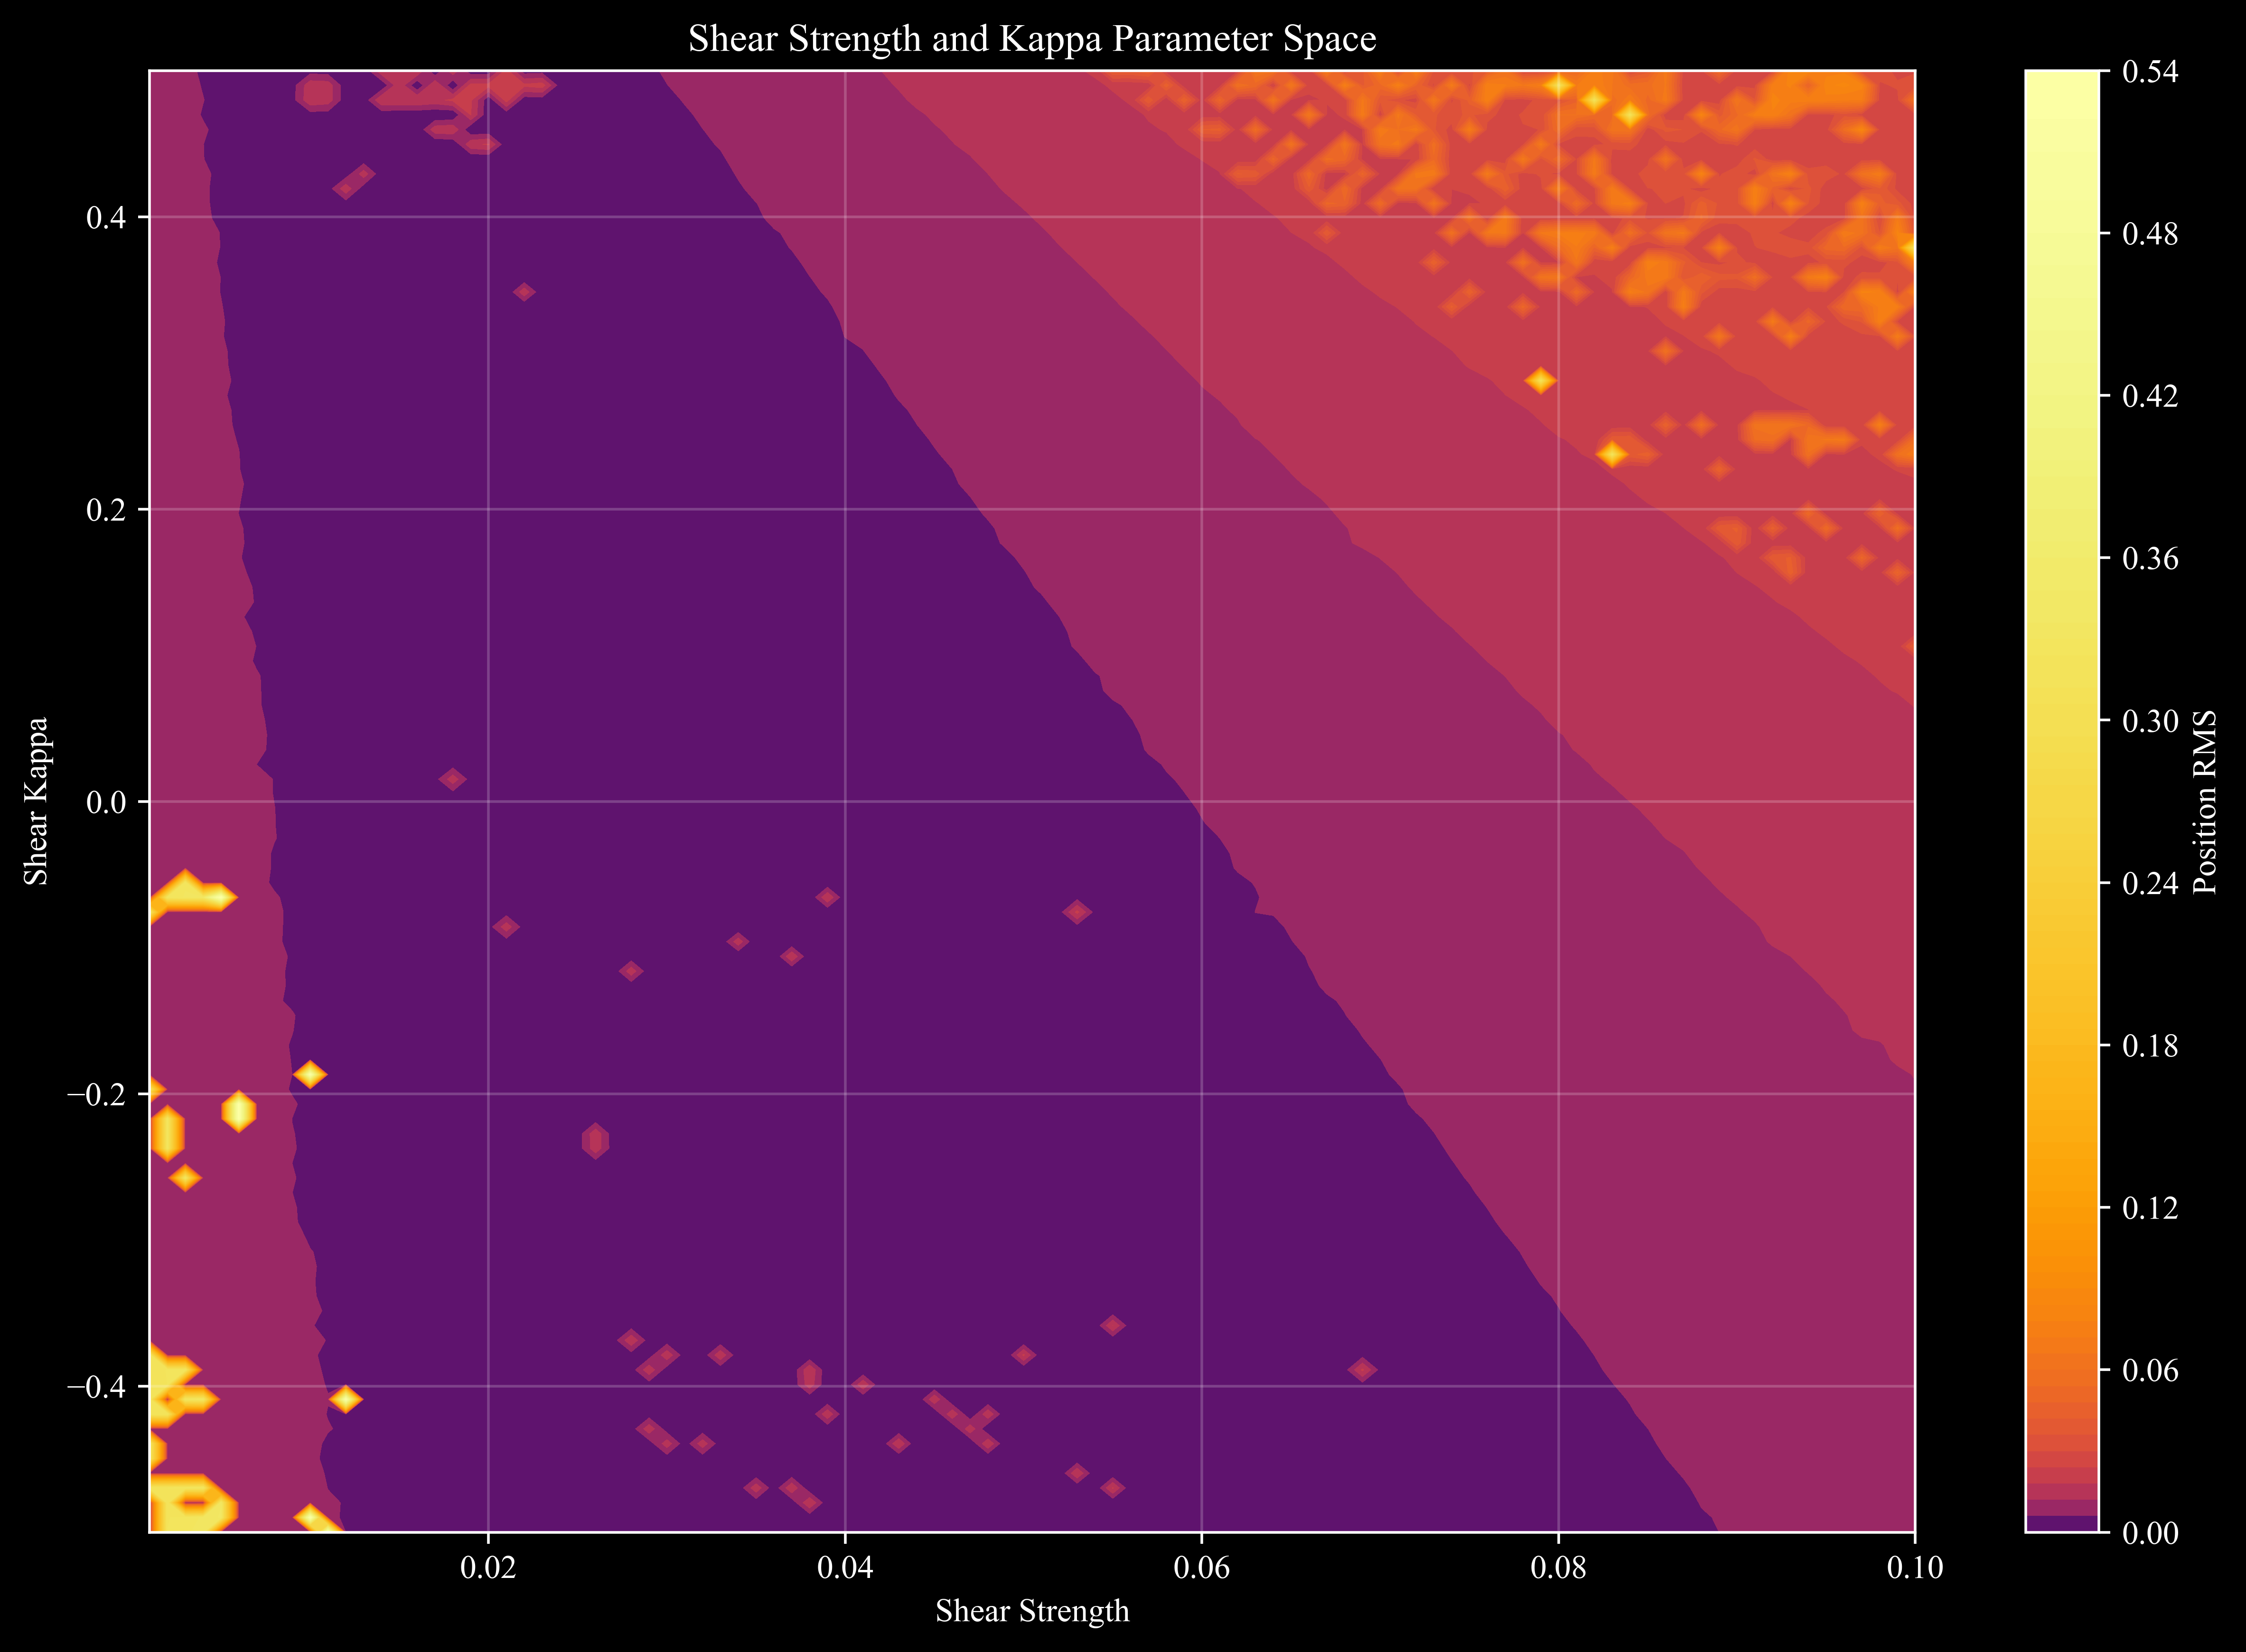

In [46]:
# Create the contour plot
plt.figure(figsize=(12, 8))

# Create the contour plot using the same data
contour = plt.contourf(xi, yi, zi, levels=100, cmap='inferno', norm=norm)

# Add a colorbar
plt.colorbar(contour, label='Position RMS')

# Set labels and title
plt.xlabel('Shear Strength', color = 'w')
plt.ylabel('Shear Kappa', color = 'w')
plt.title('Shear Strength and Kappa Parameter Space', color = 'w')

# Set the style for dark theme
plt.style.use('dark_background')
plt.grid(True, alpha=0.2)

# Show the plot
plt.show()


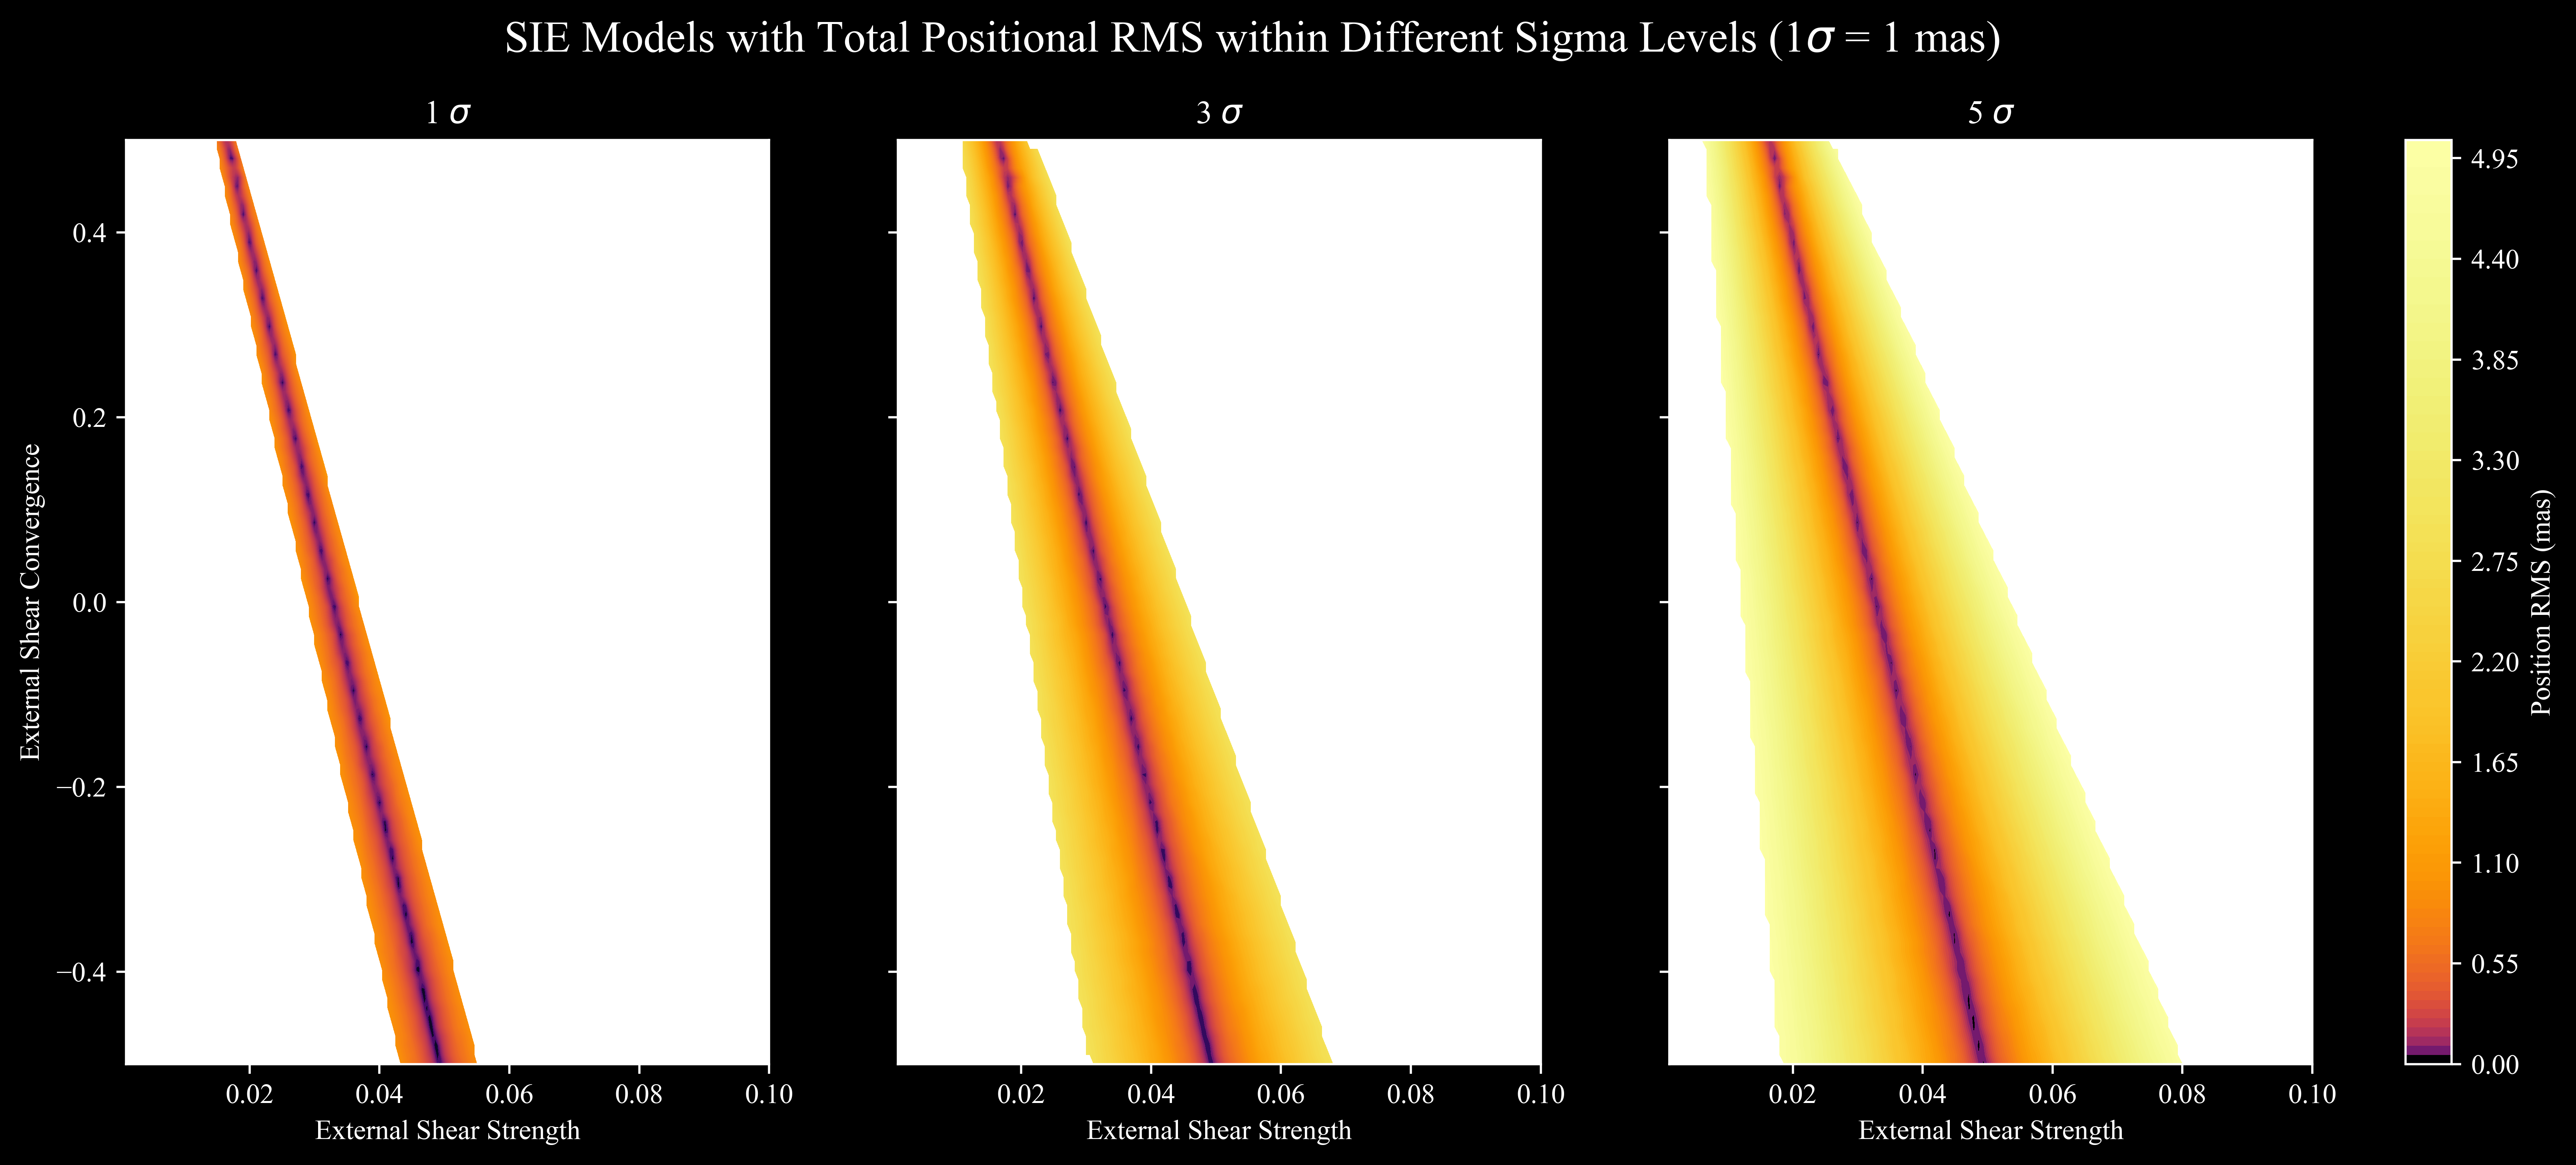

In [22]:
one_sigma = 0.001
sigma_levels = [1, 3, 5]
vmin = np.nanmin(zi[zi>0])
vmax = np.nanmax(zi)
norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=LogStretch())

# Create a figure with subplots
fig, axes = plt.subplots(1, len(sigma_levels), figsize=(15, 6), sharey=True)

for i, ax in enumerate(axes):
    # Filter data based on sigma level
    mask = (df['pos_rms'] <= one_sigma * sigma_levels[i])
    filtered_df = df[mask]
    
    # Create grid for contour plot
    xi = np.linspace(filtered_df['PERT_$\gamma$'].min(), filtered_df['PERT_$\gamma$'].max(), 100)
    yi = np.linspace(filtered_df['PERT_$\kappa$'].min(), filtered_df['PERT_$\kappa$'].max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    
    # Interpolate z values
    zi = griddata((filtered_df['PERT_$\gamma$'], filtered_df['PERT_$\kappa$']), 
                 filtered_df['pos_rms'], (xi, yi), method='cubic')
    
    # Create contour plot using the common norm
    contour = ax.contourf(xi, yi, zi, levels=100, cmap='inferno', norm=norm)
    
    ax.set_title(f'{sigma_levels[i]} $\sigma$', color='w')
    ax.set_xlabel('External Shear Strength', color='w')
    if i == 0:
        ax.set_ylabel('External Shear Convergence', color='w')
    ax.set_facecolor('white')
    ax.tick_params(colors='w')
    ax.set_xlim(0.001, 0.1)
    ax.set_ylim(-0.5, 0.5)
    # ax.grid(True, alpha=0.2, color='k')

# Add common colorbar
cbar = fig.colorbar(contour, ax=axes, label='Position RMS (mas)', orientation='vertical', fraction=0.02, pad=0.04, format=ticker.FuncFormatter(lambda x, pos: f'{x*1000:.2f}'))
cbar.ax.yaxis.label.set_color('w')
cbar.ax.tick_params(colors='w')
plt.suptitle('SIE Models with Total Positional RMS within Different Sigma Levels (1$\sigma$ = 1 mas)', color='w', fontsize=16)
plt.show()

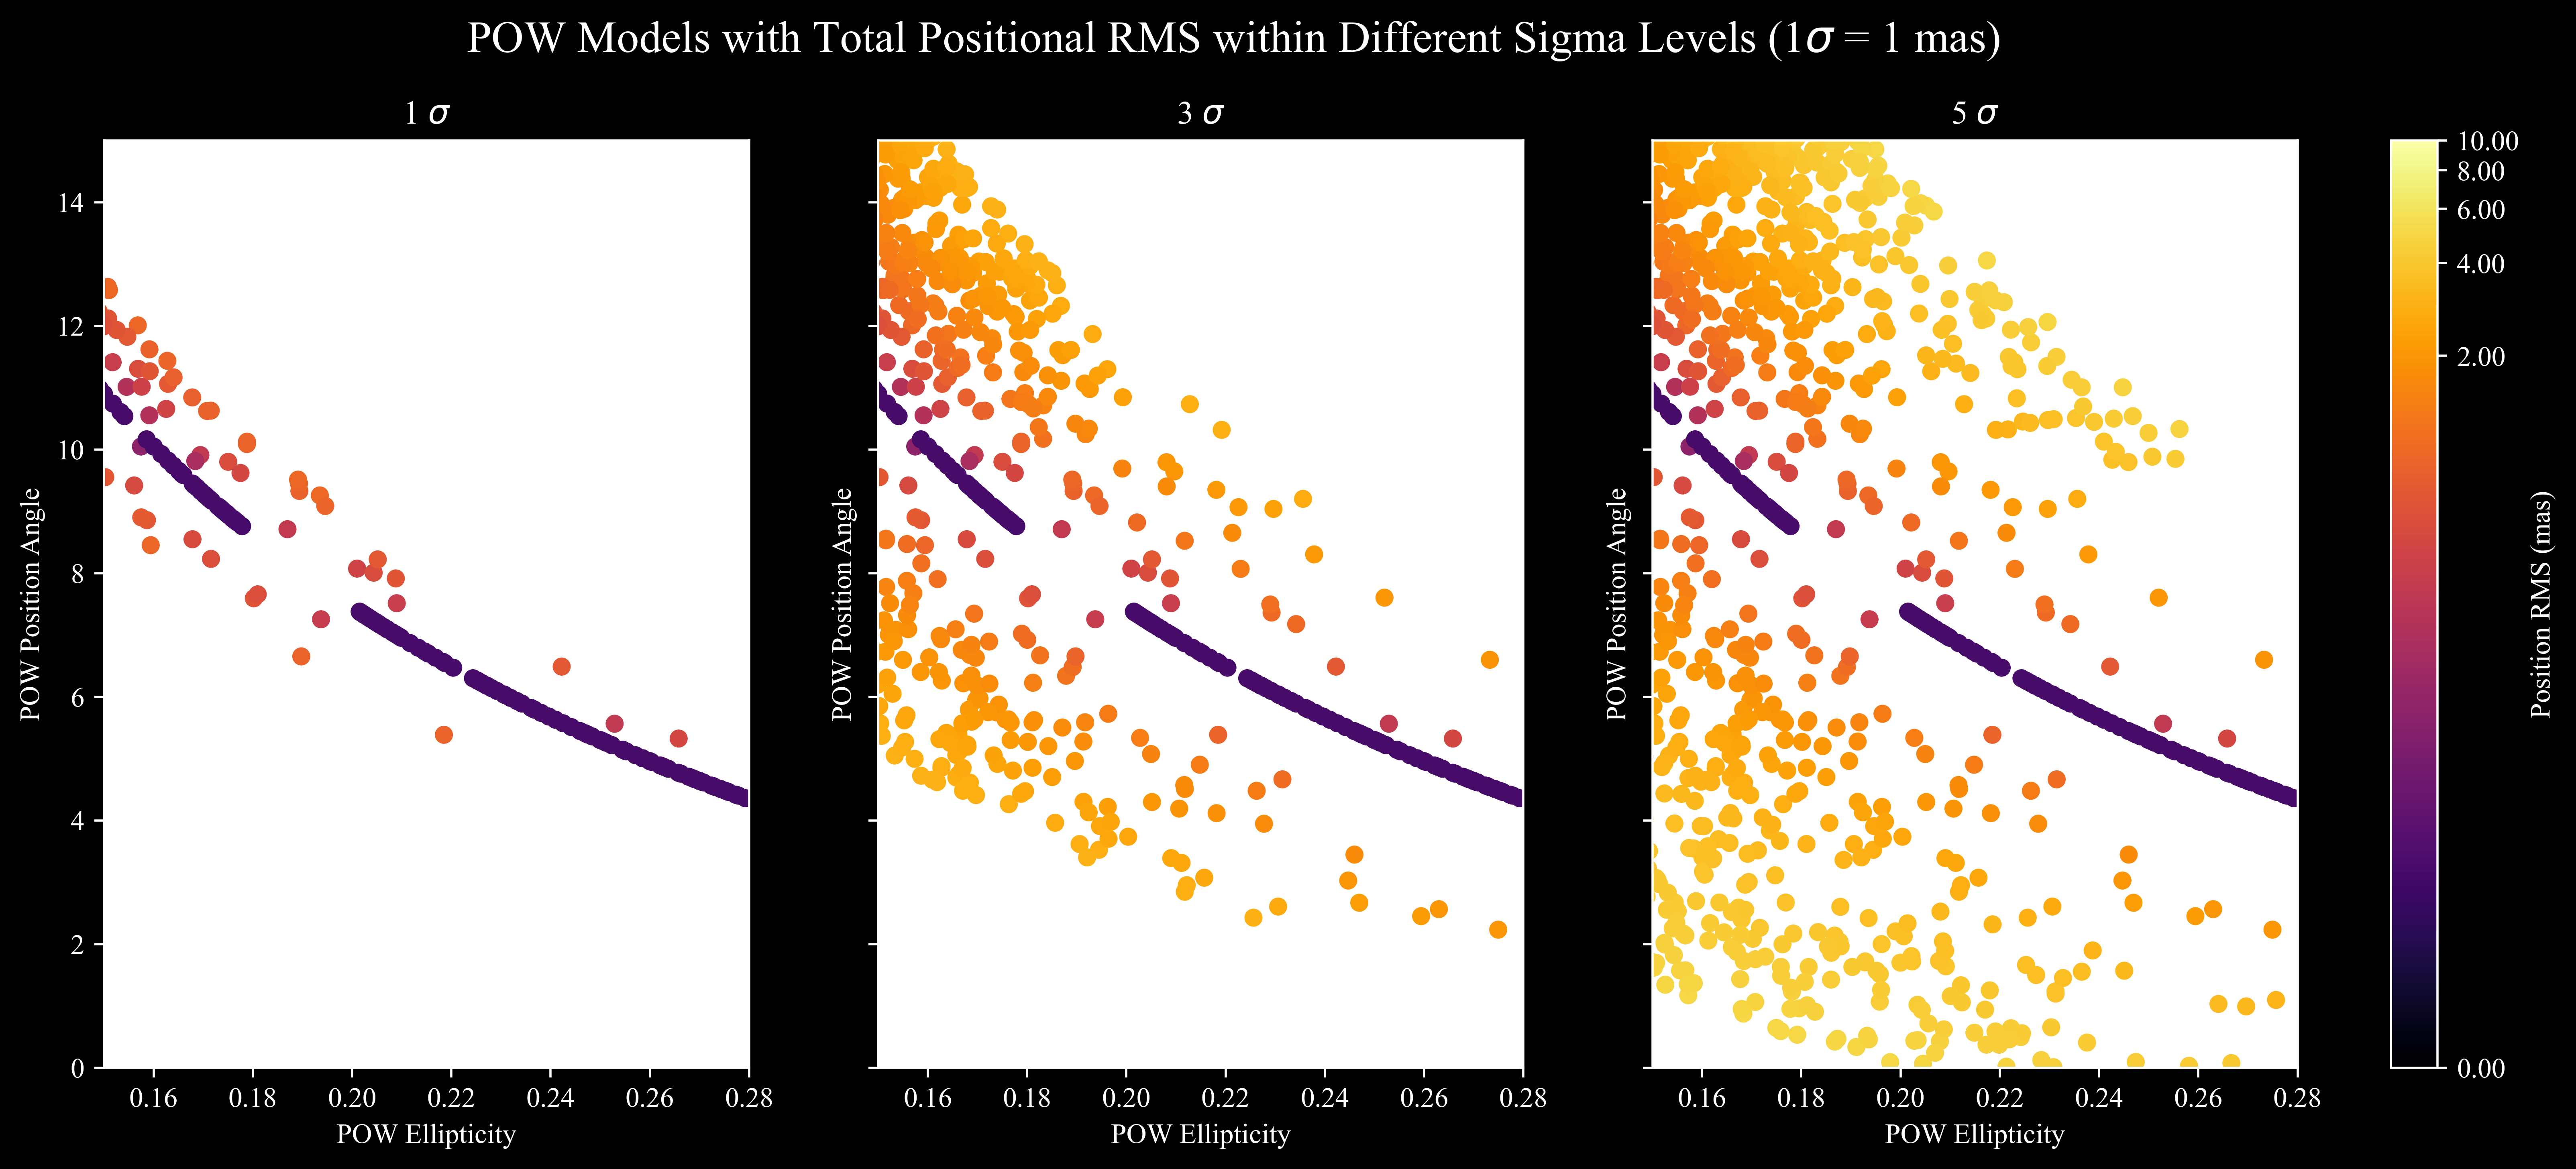

In [48]:
one_sigma = 0.001
sigma_levels = [1, 3, 5]
vmin = 0
vmax = 0.01
norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=LogStretch())

# Create a figure with subplots
fig, axes = plt.subplots(1, len(sigma_levels), figsize=(15, 6), sharey=True, sharex=True)

for i, ax in enumerate(axes):
    # Filter data based on sigma level
    mask = (df['pos_rms'] <= one_sigma * sigma_levels[i])
    filtered_df = df[mask]
    
    # Create grid for contour plot
    xi = np.linspace(filtered_df['POW_e'].min(), filtered_df['POW_e'].max(), 100)
    yi = np.linspace(filtered_df['POW_$θ_{e}$'].min(), filtered_df['POW_$θ_{e}$'].max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    
    # Interpolate z values
    zi = griddata((filtered_df['POW_e'], filtered_df['POW_$θ_{e}$']), 
                 filtered_df['pos_rms'], (xi, yi), method='cubic')
    
    # Create contour plot using the common norm
    ax.scatter(filtered_df['POW_e'], filtered_df['POW_$θ_{e}$'], c=filtered_df['pos_rms'], cmap='inferno', norm=norm, s=30)
    ax.set_xlabel('POW Ellipticity', color='w')
    ax.set_ylabel('POW Position Angle', color='w')
    ax.set_title(f'{sigma_levels[i]} $\sigma$', color='w')
    ax.tick_params(colors='w')
    ax.set_facecolor('white')
    ax.set_xlim(0.15, 0.28)
    ax.set_ylim(0, 15)
    # ax.grid(True, alpha=0.2, color='k')

# Add common colorbar
sm = plt.cm.ScalarMappable(cmap='inferno', norm=norm)
cbar = fig.colorbar(sm, ax=axes, label='Position RMS (mas)', orientation='vertical', fraction=0.02, pad=0.04, format=ticker.FuncFormatter(lambda x, pos: f'{x*1000:.2f}'))
plt.suptitle('POW Models with Total Positional RMS within Different Sigma Levels (1$\sigma$ = 1 mas)', color='w', fontsize=16)
plt.show()

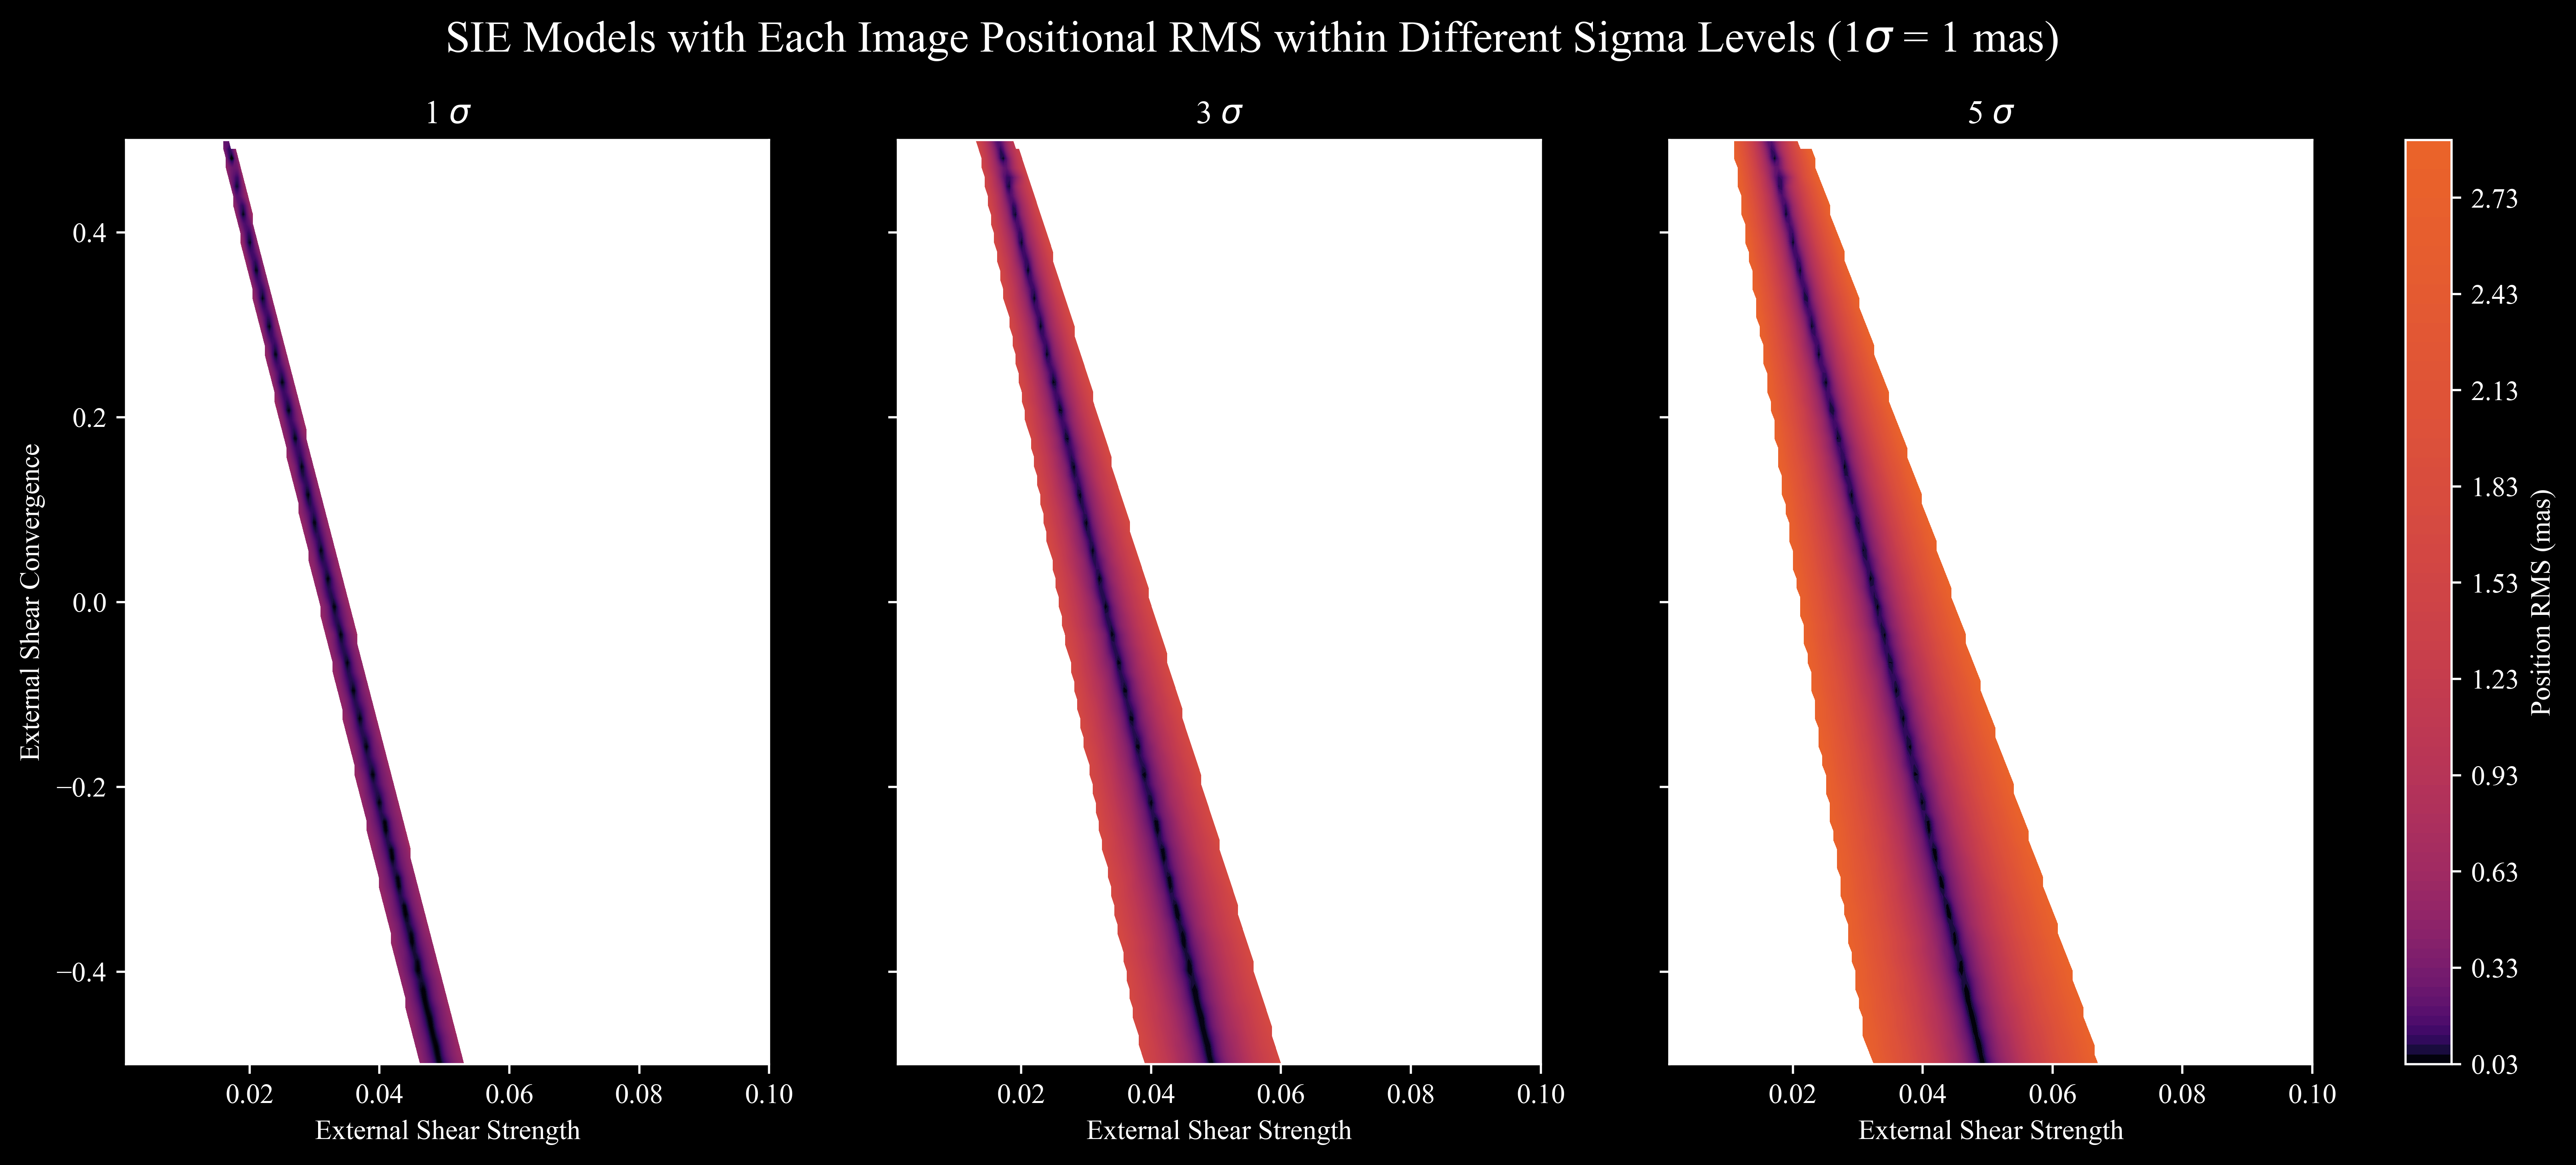

In [41]:
one_sigma = 0.001
sigma_levels = [1, 3, 5]
vmin = np.nanmin(zi[zi>0])
vmax = np.nanmax(zi)
norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=LogStretch())

# Create a figure with subplots
fig, axes = plt.subplots(1, len(sigma_levels), figsize=(15, 6), sharey=True)

for i, ax in enumerate(axes):
    # Filter data based on sigma level
    condition_img_1 = df['pos_rms_A'] <= one_sigma * sigma_levels[i]
    condition_img_2 = df['pos_rms_B'] <= one_sigma * sigma_levels[i]
    condition_img_3 = df['pos_rms_C'] <= one_sigma * sigma_levels[i]
    condition_img_4 = df['pos_rms_D'] <= one_sigma * sigma_levels[i]
    mask = condition_img_1 & condition_img_2 & condition_img_3 & condition_img_4
    filtered_df = df[mask]
    
    # Create grid for contour plot
    xi = np.linspace(filtered_df['PERT_$\gamma$'].min(), filtered_df['PERT_$\gamma$'].max(), 100)
    yi = np.linspace(filtered_df['PERT_$\kappa$'].min(), filtered_df['PERT_$\kappa$'].max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    
    # Interpolate z values
    zi = griddata((filtered_df['PERT_$\gamma$'], filtered_df['PERT_$\kappa$']), 
                 filtered_df['pos_rms'], (xi, yi), method='cubic')
    
    # Create contour plot using the common norm
    contour = ax.contourf(xi, yi, zi, levels=100, cmap='inferno', norm=norm)
    
    ax.set_title(f'{sigma_levels[i]} $\sigma$', color='w')
    ax.set_xlabel('External Shear Strength', color='w')
    if i == 0:
        ax.set_ylabel('External Shear Convergence', color='w')
    ax.set_facecolor('white')
    ax.tick_params(colors='w')
    ax.set_xlim(0.001, 0.1)
    ax.set_ylim(-0.5, 0.5)
    # ax.grid(True, alpha=0.2, color='k')

# Add common colorbar
cbar = fig.colorbar(contour, ax=axes, label='Position RMS (mas)', orientation='vertical', fraction=0.02, pad=0.04, format=ticker.FuncFormatter(lambda x, pos: f'{x*1000:.2f}'))
cbar.ax.yaxis.label.set_color('w')
cbar.ax.tick_params(colors='w')
plt.suptitle('SIE Models with Each Image Positional RMS within Different Sigma Levels (1$\sigma$ = 1 mas)', color='w', fontsize=16)
plt.show()

In [ ]:
# Animation settings
if os.path.exists('frames'):
    shutil.rmtree('frames')
os.makedirs('frames')

fps = 20
duration = 10  # seconds
total_frames = int(duration * fps)
sigma_start = 0.1
sigma_end = 10

# Create array of sigma values for each frame
sigma_values = np.linspace(sigma_start, sigma_end, total_frames)

vmin = 1e-5
vmax = 0.01
norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=LogStretch())


for i in range(len(sigma_values)):
    mask = (df['pos_rms'] <= one_sigma * sigma_values[i])
    filtered_df = df[mask]
    
    # Create grid for contour plot
    xi = np.linspace(filtered_df['PERT_$\gamma$'].min(), filtered_df['PERT_$\gamma$'].max(), 100)
    yi = np.linspace(filtered_df['PERT_$\kappa$'].min(), filtered_df['PERT_$\kappa$'].max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    
    # Interpolate z values
    zi = griddata((filtered_df['PERT_$\gamma$'], filtered_df['PERT_$\kappa$']), 
                 filtered_df['pos_rms'], (xi, yi), method='cubic')
    
    plt.figure(figsize=(8, 10))
    plt.scatter(filtered_df['SIE_e'], filtered_df['SIE_$θ_{e}$'], c=filtered_df['pos_rms'], cmap='inferno', norm=norm, s=5)
    plt.xlabel('SIE Ellipticity', color='w')
    plt.ylabel('SIE Position Angle', color='w')
    plt.title(f'{sigma_values[i]:.2f} $\sigma$', color='w')
    plt.tick_params(colors='w')
    
    plt.savefig(f'frames/frame_{i:03d}.png')
    plt.close()

# Create the animation from the saved frames
frame_files = [f'frames/frame_{i:03d}.png' for i in range(len(sigma_values))]
clip = mpy.ImageSequenceClip(frame_files, fps=10)
clip.write_videofile("sigma_animation.mp4", codec="libx264")

# Clean up the frames directory
shutil.rmtree('frames')

In [47]:
# Animation settings
if os.path.exists('frames'):
    shutil.rmtree('frames')
os.makedirs('frames')

fps = 20
duration = 10  # seconds
total_frames = int(duration * fps)
sigma_start = 0.1
sigma_end = 10

# Create array of sigma values for each frame
sigma_values = np.linspace(sigma_start, sigma_end, total_frames)

vmin = 1e-5
vmax = 0.01
norm = ImageNormalize(vmin=vmin, vmax=vmax, stretch=LogStretch())


for i in range(len(sigma_values)):
    mask = (df['pos_rms'] <= one_sigma * sigma_values[i])
    filtered_df = df[mask]
    
    # Create grid for contour plot
    xi = np.linspace(filtered_df['SIE_e'].min(), filtered_df['SIE_e'].max(), 100)
    yi = np.linspace(filtered_df['SIE_$θ_{e}$'].min(), filtered_df['SIE_$θ_{e}$'].max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    
    # Interpolate z values
    zi = griddata((filtered_df['SIE_e'], filtered_df['SIE_$θ_{e}$']), 
                 filtered_df['pos_rms'], (xi, yi), method='cubic')
    
    plt.figure(figsize=(8, 10))
    contour = plt.contourf(xi, yi, zi, levels=100, cmap='inferno', norm=norm)
    plt.title(f'{sigma_values[i]:.2f} $\sigma$', color='w')
    plt.xlabel('SIE Ellipticity', color='w')
    plt.ylabel('SIE Position Angle', color='w')
    plt.gca().set_facecolor('black')
    plt.gca().tick_params(colors='w')
    plt.xlim(0.16, 0.26)
    plt.ylim(-50, 50)

    
    # Correctly add colorbar using the local contour object
    cbar = plt.colorbar(contour, label='Position RMS (mas)', orientation='vertical', fraction=0.09, pad=0.04, format=ticker.FuncFormatter(lambda x, pos: f'{x*1000:.2f}'))
    cbar.ax.yaxis.label.set_color('w')
    cbar.ax.tick_params(colors='w')
    
    plt.savefig(f'frames/frame_{i:03d}.png')
    plt.close()

# Create the animation from the saved frames
frame_files = [f'frames/frame_{i:03d}.png' for i in range(len(sigma_values))]
clip = mpy.ImageSequenceClip(frame_files, fps=10)
clip.write_videofile("sie_param_animation.mp4", codec="libx264")

# Clean up the frames directory
shutil.rmtree('frames')

MoviePy - Building video sie_param_animation.mp4.
MoviePy - Writing video sie_param_animation.mp4



MoviePy - Done !
MoviePy - video ready sie_param_animation.mp4
